# PROJECT -- 01
    Project-1 :  To Predict the Customers Who are Eligible For the Loan 

#IMPORTING THE LIBRARIES

In [ ]:
# importing numpy Library
import numpy as np

# To store the data in a table/dataframe we need to use pandas Library
import pandas as pd

# importing matbplotlib Library
import matplotlib.pyplot as plt

# importing the seaborn Library
import seaborn as sns

# importing re module
import re

# Importing the model from sklearn
from sklearn.linear_model import LogisticRegression

# Importing the train_test_split to train and test the model
from sklearn.model_selection import train_test_split

# Importing Confusion_Metrics form Sklearn Metrics
from sklearn.metrics import confusion_matrix

# IMPORTING THE DATASET
DATA-SET :- : https://drive.google.com/drive/folders/1-QOrDBpVvXWb_zAsaxZnalmvUQRA7yOb?usp=sharing

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/DAY-28-DS-SHAPE-AI/Training Data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/DAY-28-DS-SHAPE-AI/Testing Data.csv')

In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#EDA => EXPLORATORY DATA ANALYSIS (DE, DM, DC, DV)

#DATA ANALYSIS OF TRAIN DATA SET

In [ ]:
df_train.shape

(614, 13)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df_train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
df_train['Gender'][df_train['Gender'].isnull()]='Male'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
df_train.Gender.replace(["Male","Female"],["0","1"],inplace=True)

In [ ]:
df_train.Gender.value_counts()

0    502
1    112
Name: Gender, dtype: int64

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df_train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
df_train['Married'][df_train['Married'].isnull()]='Yes'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [ ]:
df_train.Married.replace(["Yes","No"],["0","1"], inplace=True)

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df_train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df_train['Dependents'][df_train['Dependents'].isnull()]='0'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df_train.loc[df_train.Dependents=='3+','Dependents']= 4

In [ ]:
df_train.Dependents.value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df_train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
df_train.Education.replace(["Graduate","Not Graduate"],["0","1"], inplace=True)

In [ ]:
df_train.Education.value_counts()

0    480
1    134
Name: Education, dtype: int64

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,0,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df_train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
df_train['Self_Employed'][df_train['Self_Employed'].isnull()]='No'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
df_train.Self_Employed.replace(["Yes","No"],["0","1"], inplace=True)

In [ ]:
df_train.Self_Employed.value_counts()

1    532
0     82
Name: Self_Employed, dtype: int64

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df_train.ApplicantIncome.value_counts().sum()

614

In [ ]:
df_train.CoapplicantIncome.value_counts().sum()

614

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df_train.LoanAmount.value_counts().sum()

592

In [ ]:
df_train['LoanAmount'][df_train['LoanAmount'].isnull()]= df_train['LoanAmount'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.LoanAmount.value_counts().sum()

614

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,0,1,0,1,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [ ]:
df_train.Loan_Amount_Term.value_counts().sum()

600

In [ ]:
df_train['Loan_Amount_Term'][df_train['Loan_Amount_Term'].isnull()]='360'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.Loan_Amount_Term.value_counts().sum()

614

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,0,1,0,1,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [ ]:
df_train['Credit_History'][df_train['Credit_History'].isnull()]='1'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.Credit_History.value_counts().sum()

614

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,0,1,0,1,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [ ]:
df_train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
df_train.Property_Area.replace(["Semiurban","Urban","Rural"],["0","1","2"], inplace=True)

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,146.412162,360.0,1.0,1,Y
1,LP001003,0,0,1,0,1,4583,1508.0,128.000000,360.0,1.0,2,N


In [ ]:
df_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
df_train.Loan_Status.replace(["Y","N"],["1","0"], inplace=True)

In [ ]:
df_train.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,0,0,1,0,1,4583,1508.0,128.000000,360.0,1.0,2,0


In [ ]:
df_train.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,5849,0.0,146.412162,360.0,1.0,1,1
1,0,0,1,0,1,4583,1508.0,128.000000,360.0,1.0,2,0
2,0,0,0,0,0,3000,0.0,66.000000,360.0,1.0,1,1
3,0,0,0,1,1,2583,2358.0,120.000000,360.0,1.0,1,1
4,0,1,0,0,1,6000,0.0,141.000000,360.0,1.0,1,1


In [ ]:
df_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.565620
CoapplicantIncome,-0.116605,1.000000,0.187828
LoanAmount,0.565620,0.187828,1.000000


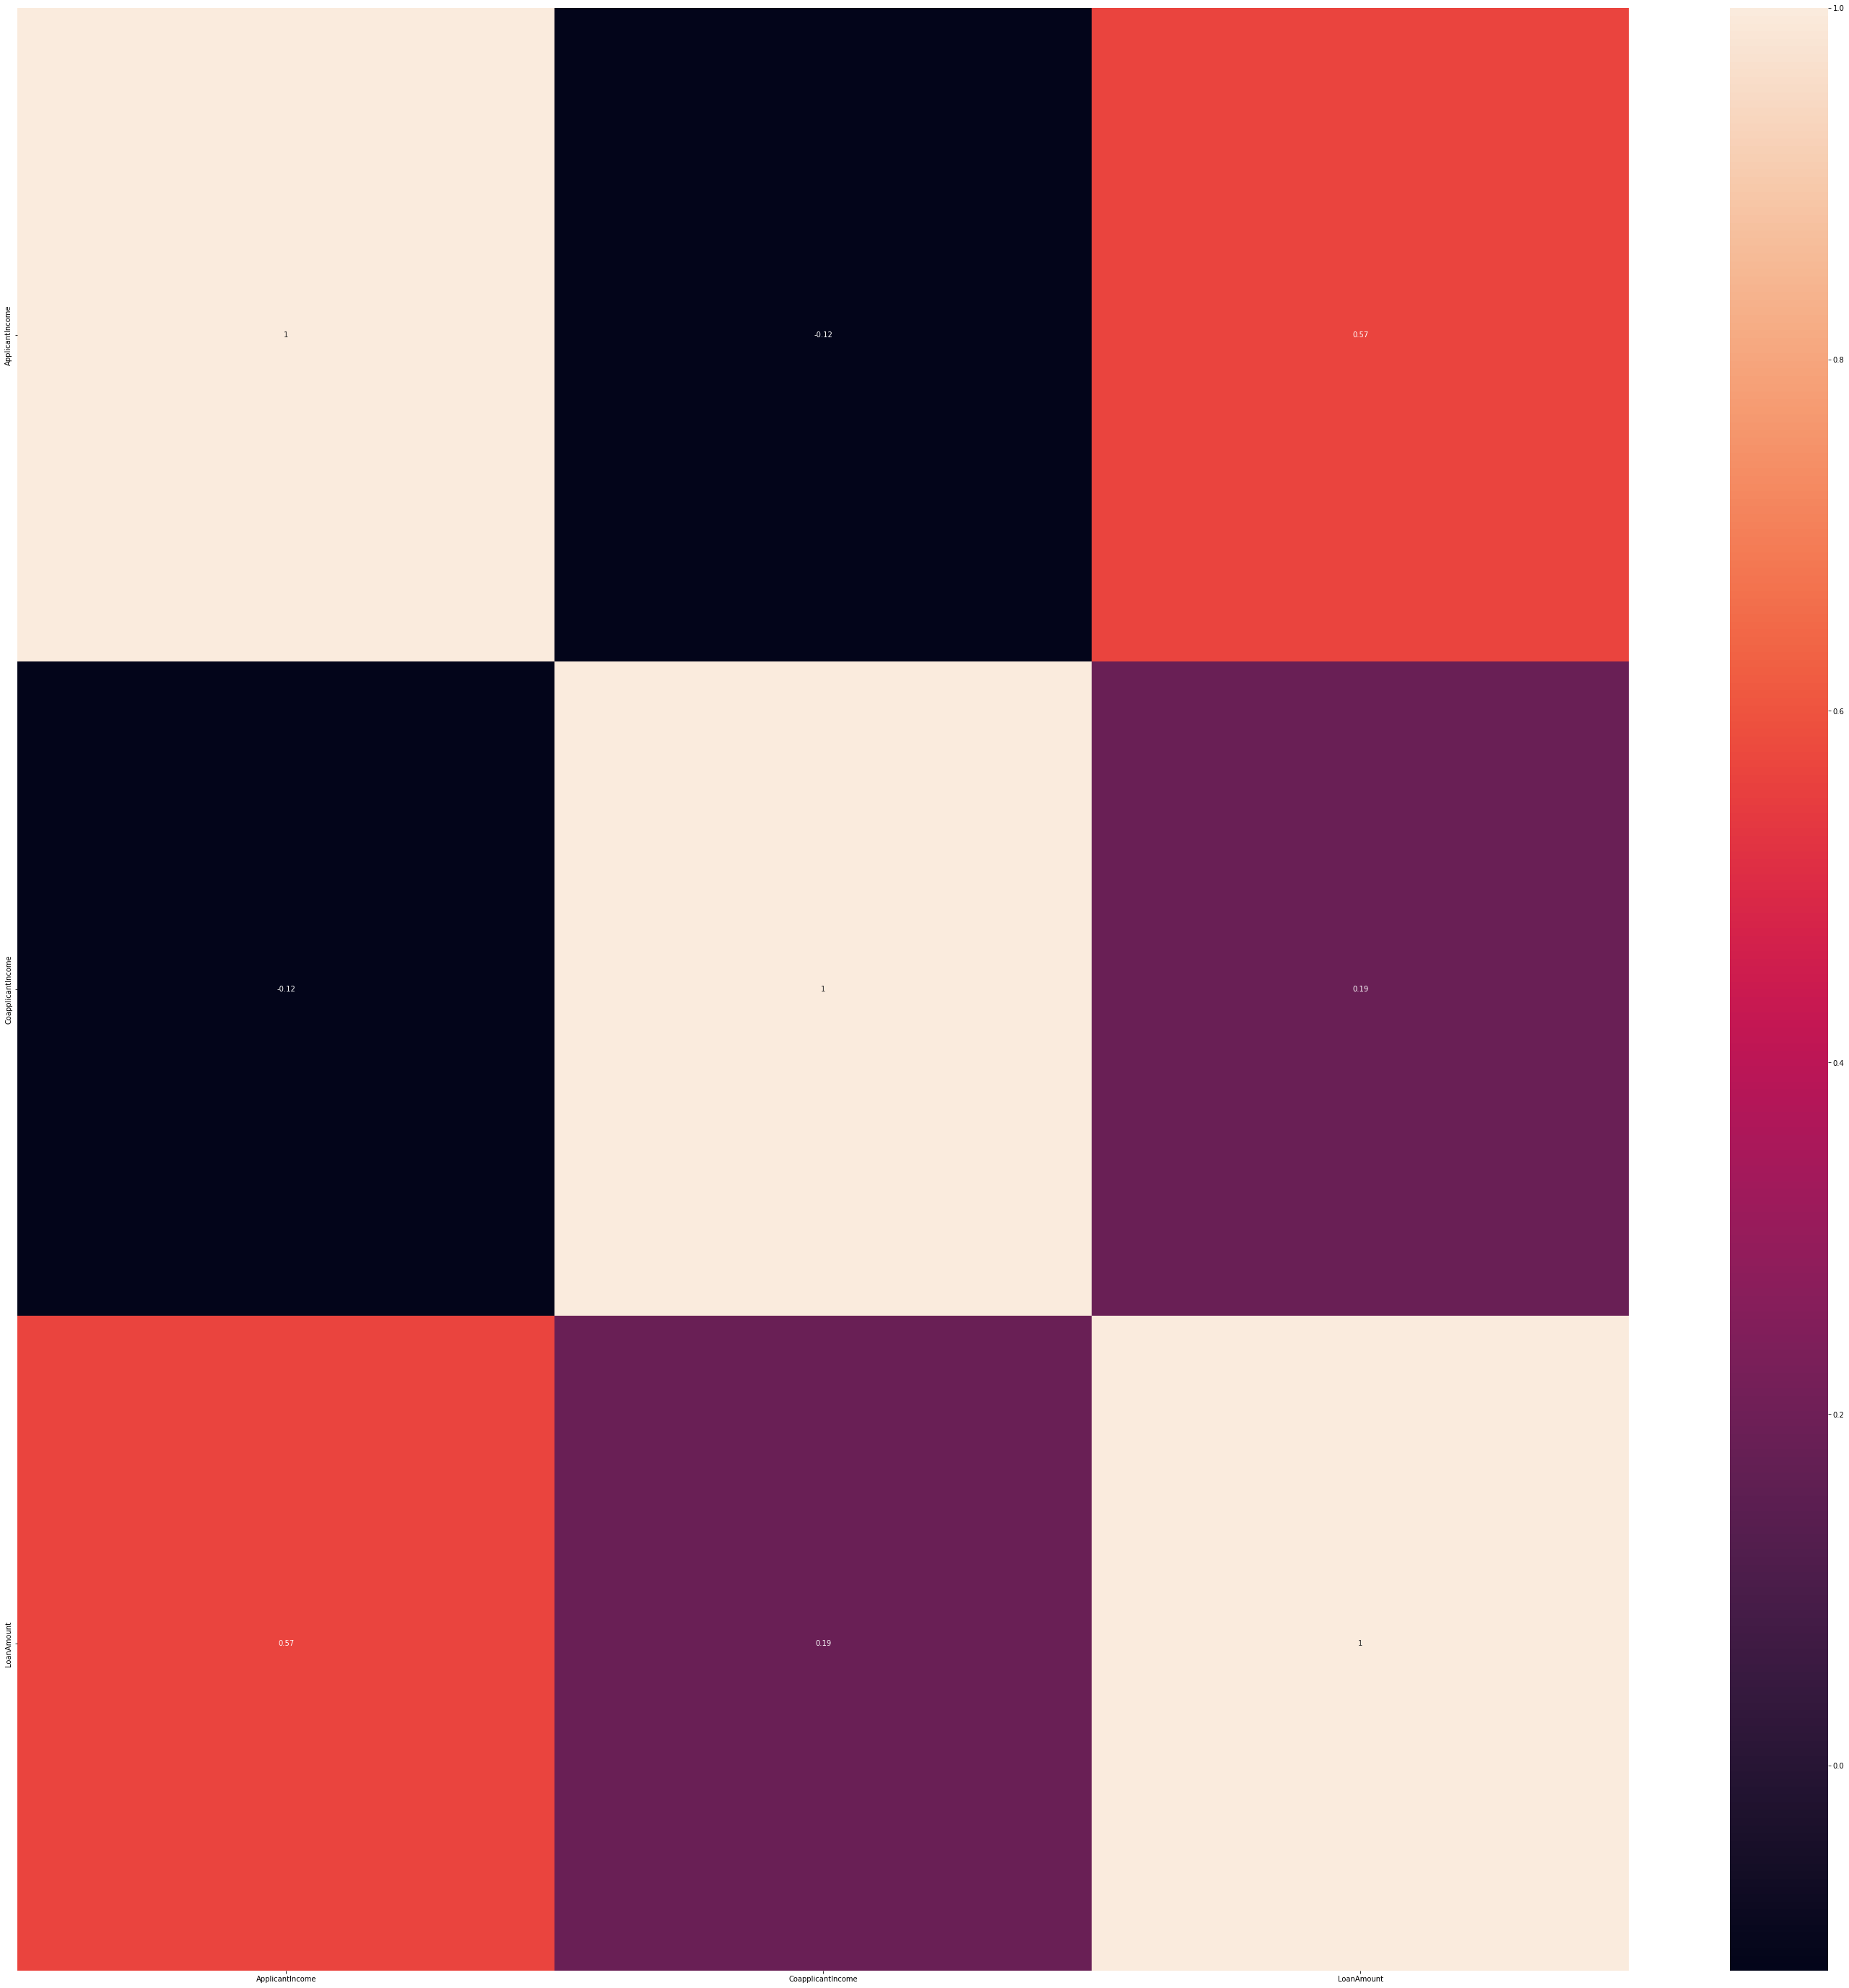

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(df_train.corr(), annot=True)

#DATA ANALYSIS OF TEST DATA SET

In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
df_test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [ ]:
df_test['Gender'][df_test['Gender'].isnull()]='Male'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.Gender.value_counts()

Male      297
Female     70
Name: Gender, dtype: int64

In [ ]:
df_test.Gender.replace(["Male","Female"],["0","1"], inplace=True)

In [ ]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
df_test.Married.value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [ ]:
df_test.Married.replace(["Yes","No"],["0","1"], inplace=True)

In [ ]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,0,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
df_test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [ ]:
df_test['Dependents'][df_test['Dependents'].isnull()]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
0      10
Name: Dependents, dtype: int64

In [ ]:
df_test.Dependents.replace(["0","2","1","3+"],["0","1","2","4"],inplace=True)

In [ ]:
df_test.Dependents.value_counts()

0    200
1     59
2     58
4     40
0     10
Name: Dependents, dtype: int64

In [ ]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,0,2,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
df_test.Education.value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [ ]:
df_test.Education.replace(["Graduate","Not Graduate"],["0","1"], inplace=True)

In [ ]:
df_test.Education.value_counts()

0    283
1     84
Name: Education, dtype: int64

In [ ]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,0,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,0,2,0,No,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
df_test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
df_test['Self_Employed'][df_test['Self_Employed'].isnull()]='No'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.Self_Employed.value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
df_test.Self_Employed.replace(["Yes","No"],["0","1"], inplace=True)

In [ ]:
df_test.Self_Employed.value_counts()

1    330
0     37
Name: Self_Employed, dtype: int64

In [ ]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,0,1,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,0,2,0,1,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
df_test.LoanAmount.value_counts().sum()

362

In [ ]:
df_test['LoanAmount'][df_test['LoanAmount'].isnull()]= df_test['LoanAmount'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.LoanAmount.value_counts().sum()

367

In [ ]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,0,1,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,0,2,0,1,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
df_test.Loan_Amount_Term.value_counts().sum()

361

In [ ]:
df_test['Loan_Amount_Term'][df_test['Loan_Amount_Term'].isnull()]=360

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.Loan_Amount_Term.value_counts().sum()

367

In [ ]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,0,1,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,0,2,0,1,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
df_test.Credit_History.value_counts().sum()

338

In [ ]:
df_test['Credit_History'][df_test['Credit_History'].isnull()]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.Credit_History.value_counts().sum()

367

In [ ]:
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,0,1,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,0,2,0,1,3076,1500,126.0,360.0,1.0,Urban


In [ ]:
df_test.Property_Area.value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [ ]:
df_test['Property_Area'][df_test['Property_Area'].isnull()]='Urban'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.Property_Area.replace(["Urban","Semiurban","Rural"],["0","1","2"], inplace=True)

In [ ]:
df_test.Property_Area.value_counts()

0    140
1    116
2    111
Name: Property_Area, dtype: int64

In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,0,1,5720,0,110.0,360.0,1.0,0
1,LP001022,0,0,2,0,1,3076,1500,126.0,360.0,1.0,0
2,LP001031,0,0,1,0,1,5000,1800,208.0,360.0,1.0,0
3,LP001035,0,0,1,0,1,2340,2546,100.0,360.0,1.0,0
4,LP001051,0,1,0,1,1,3276,0,78.0,360.0,1.0,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df_test.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.490174,0.023319,0.094944
CoapplicantIncome,-0.110335,1.000000,0.150112,-0.008633,-0.058004
LoanAmount,0.490174,0.150112,1.000000,0.093476,-0.013201
Loan_Amount_Term,0.023319,-0.008633,0.093476,1.000000,-0.048189
Credit_History,0.094944,-0.058004,-0.013201,-0.048189,1.000000


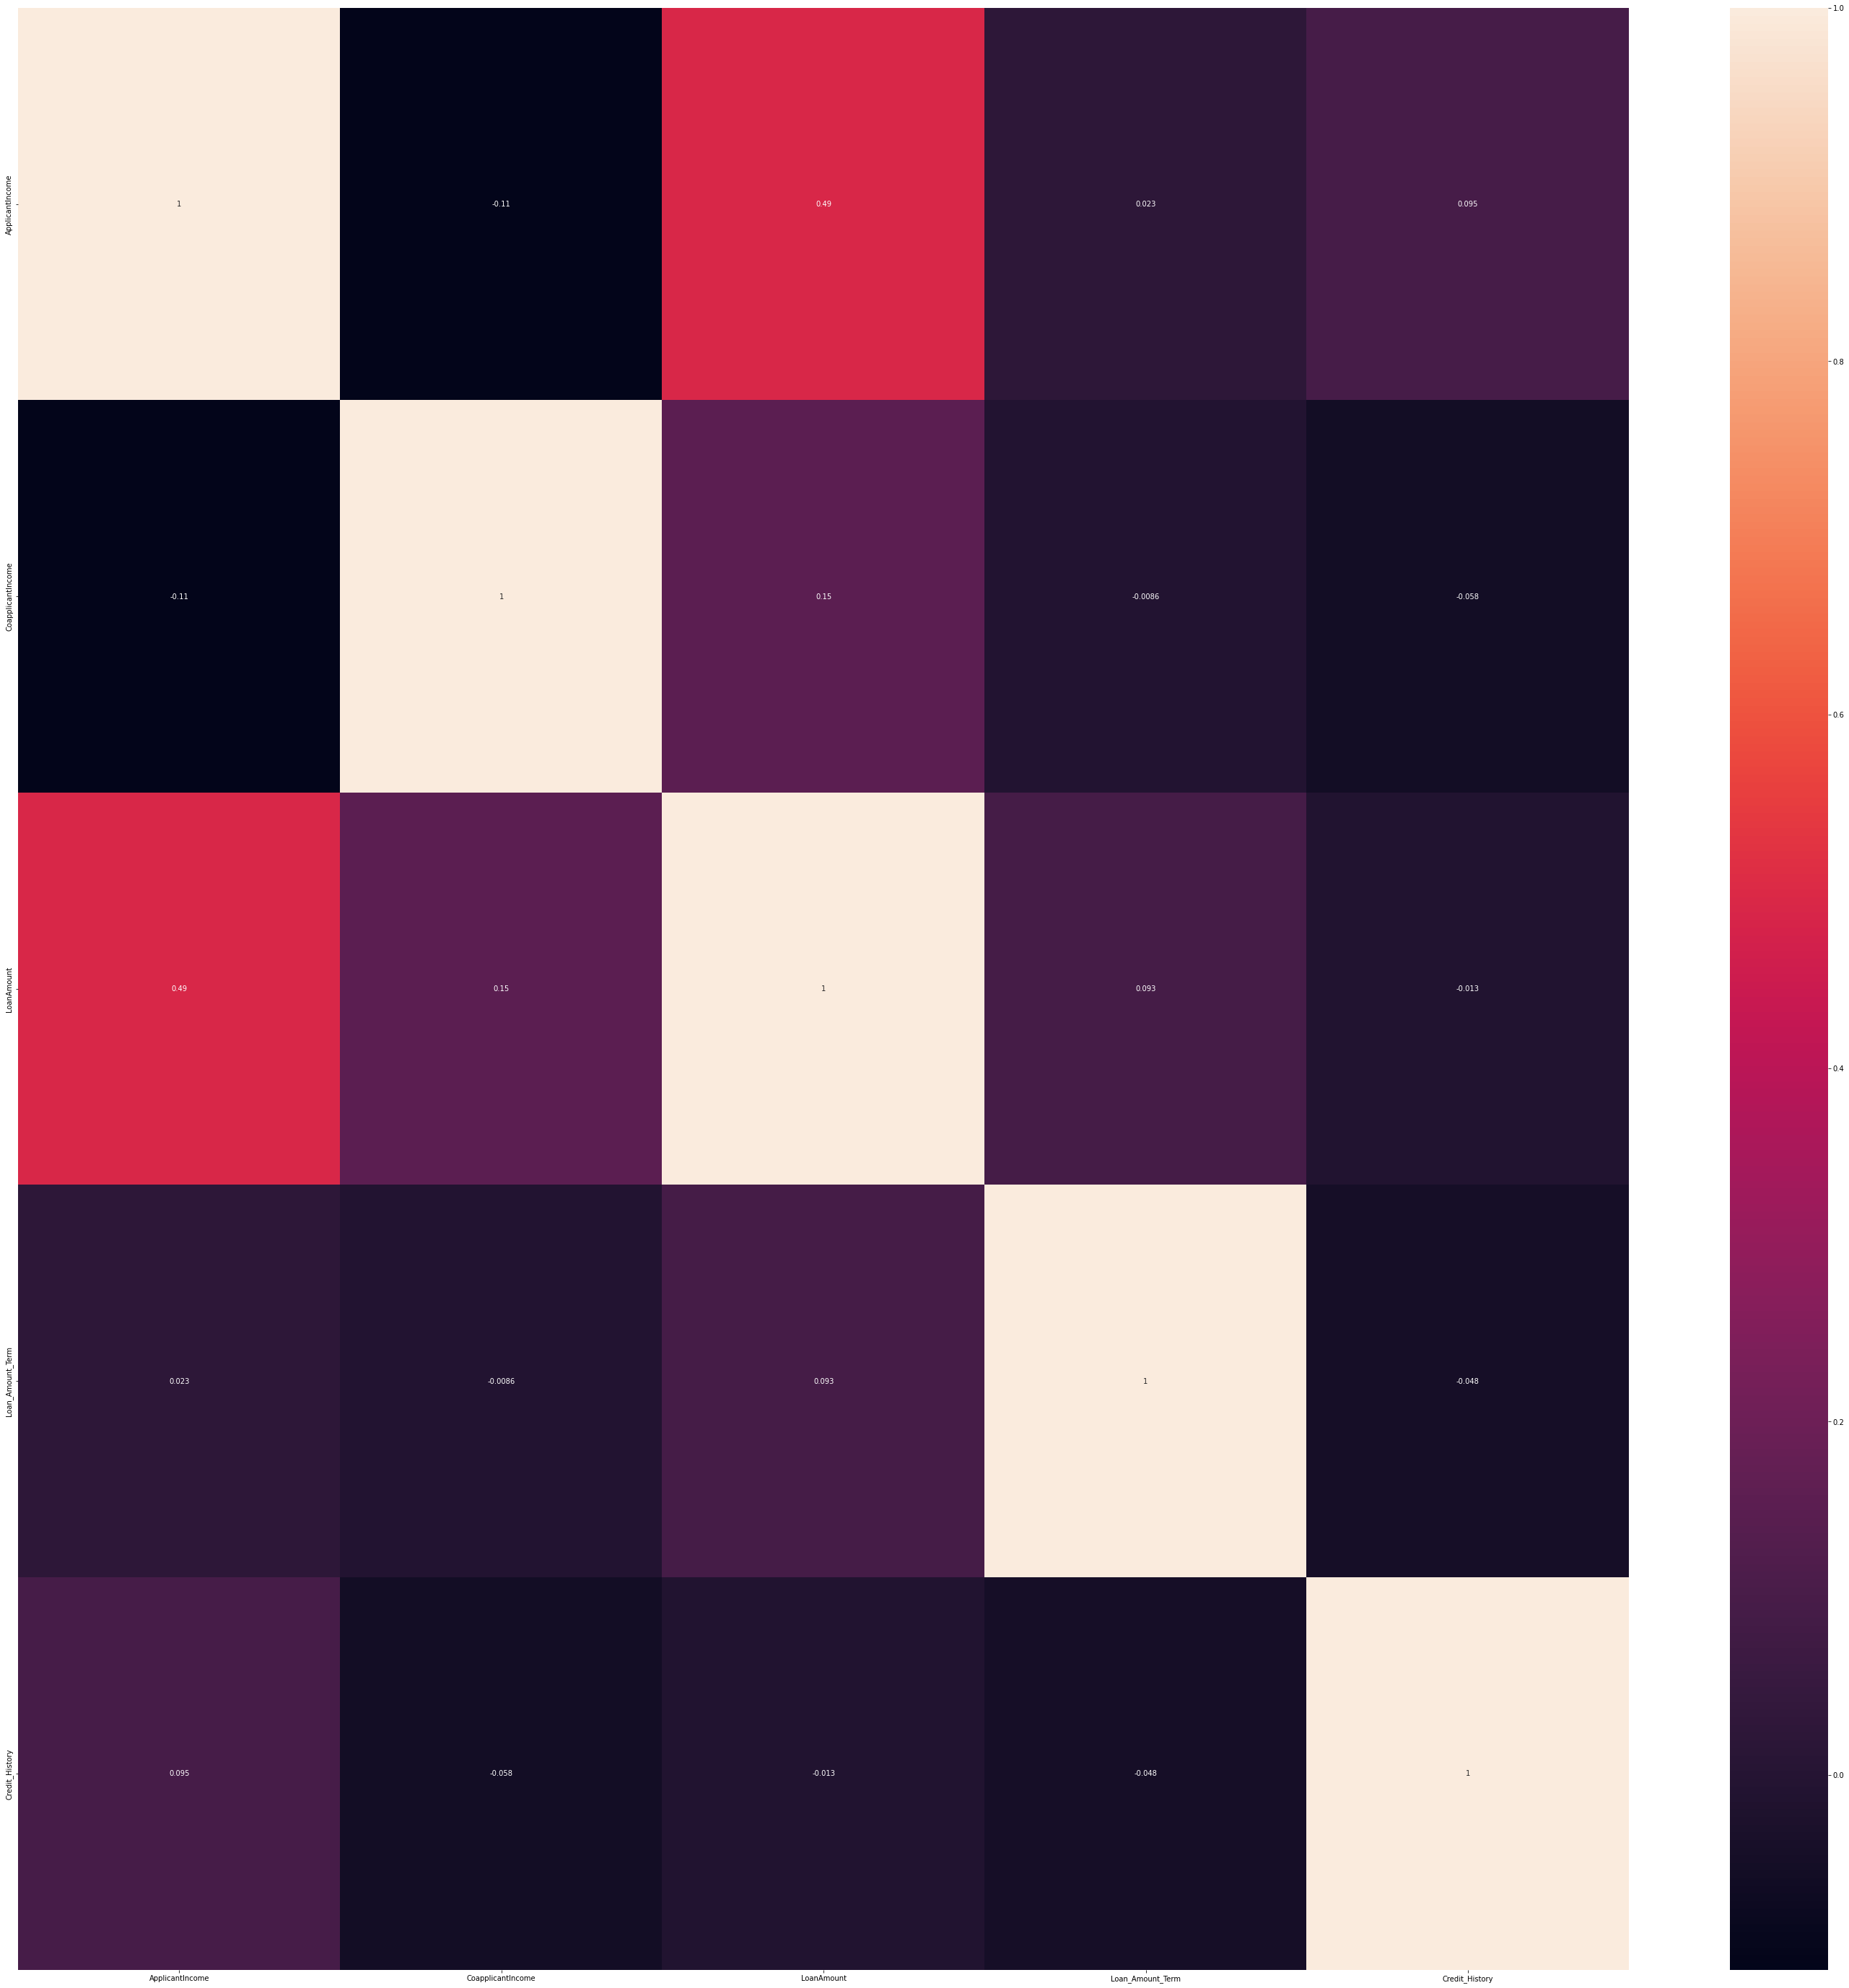

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(df_test.corr(), annot=True)

# MODEL SELECTION

In [ ]:
classifier = LogisticRegression()

#SPLITTING THE DATASET

In [ ]:
X = df_train.drop('Loan_Status', axis=1)
Y = df_train.Loan_Status

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Training The Dataset

In [ ]:
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# Testing The Model

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
finaldf = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})

In [ ]:
finaldf

,Actual,Predicted
350,1,1
377,1,1
163,1,1
609,1,1
132,1,1
...,...,...
231,1,1
312,1,1
248,1,1
11,1,1


# Performance Checking / Accuracy

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[18, 25],
       [ 1, 79]])

In [ ]:
# accuracy = (18 + 79)/Total = 97/123

In [ ]:
accuracy = 97/123

In [ ]:
accuracy

0.7886178861788617

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(Y_test, Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.42      0.58        43\n           1       0.76      0.99      0.86        80\n\n    accuracy                           0.79       123\n   macro avg       0.85      0.70      0.72       123\nweighted avg       0.83      0.79      0.76       123\n'

# Pickle  Model

In [ ]:
import pickle 

In [ ]:
filename = 'Loan_Pred_model'
pickle.dump(LogisticRegression,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.Predict(X_train)

EOFError: ignored